In [9]:
# from config import API_key
import requests
import pandas as pd
# import date

In [29]:
# Null Hypothesis
# Alternative Hypothesis

In [10]:
moon_stuff = pd.read_csv("Resources/history_data.csv")

moon_stuff["Date"] = pd.to_datetime(moon_stuff["Date time"])
moon_stuff.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,...,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,Sunset,Sunrise,Moon Phase,Date
0,"Harrisburg, PA, United States",01/01/2015,40.9,17.8,31.4,12.7,NaN,0.01,NaN,NaN,...,229.83,25.5,9.9,1.5,45.12,Rain,2015-01-01T16:52:00-05:00,2015-01-01T07:30:16-05:00,0.41,2015-01-01
1,"Harrisburg, PA, United States",01/02/2015,43.0,26.3,34.6,26.8,NaN,0.00,NaN,NaN,...,195.58,34.4,9.9,7.6,52.17,Clear,2015-01-02T16:52:51-05:00,2015-01-02T07:30:22-05:00,0.45,2015-01-02
2,"Harrisburg, PA, United States",01/03/2015,35.8,22.1,30.7,22.2,NaN,0.57,NaN,NaN,...,73.17,NaN,5.0,73.0,86.17,"Rain, Partially cloudy",2015-01-03T16:53:43-05:00,2015-01-03T07:30:26-05:00,0.48,2015-01-03
3,"Harrisburg, PA, United States",01/04/2015,49.8,35.0,39.9,31.8,NaN,0.19,NaN,NaN,...,97.21,40.3,2.8,84.2,90.21,"Rain, Overcast",2015-01-04T16:54:36-05:00,2015-01-04T07:30:28-05:00,0.49,2015-01-04
4,"Harrisburg, PA, United States",01/05/2015,43.9,20.8,31.9,9.5,NaN,0.00,NaN,NaN,...,298.79,38.8,9.9,50.8,42.62,Partially cloudy,2015-01-05T16:55:31-05:00,2015-01-05T07:30:28-05:00,0.50,2015-01-05


In [11]:
emergency_csv = pd.read_csv("Resources/911.csv")

emergency_csv["Date"] = emergency_csv["timeStamp"].str.slice(0,10)
emergency_csv["Date"] = pd.to_datetime(emergency_csv["Date"])
emergency_csv.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015-12-10


In [12]:
merged_df = pd.merge(emergency_csv, moon_stuff, on = "Date", how = "left")
merged_df.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Date,...,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,Sunset,Sunrise,Moon Phase
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,2015-12-10,...,5.8,125.58,28.9,3.8,52.0,82.1,"Rain, Partially cloudy",2015-12-10T16:41:20-05:00,2015-12-10T07:19:05-05:00,0.99
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015-12-10,...,5.8,125.58,28.9,3.8,52.0,82.1,"Rain, Partially cloudy",2015-12-10T16:41:20-05:00,2015-12-10T07:19:05-05:00,0.99
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,2015-12-10,...,5.8,125.58,28.9,3.8,52.0,82.1,"Rain, Partially cloudy",2015-12-10T16:41:20-05:00,2015-12-10T07:19:05-05:00,0.99
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,2015-12-10,...,5.8,125.58,28.9,3.8,52.0,82.1,"Rain, Partially cloudy",2015-12-10T16:41:20-05:00,2015-12-10T07:19:05-05:00,0.99
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015-12-10,...,5.8,125.58,28.9,3.8,52.0,82.1,"Rain, Partially cloudy",2015-12-10T16:41:20-05:00,2015-12-10T07:19:05-05:00,0.99


In [13]:
merged_df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'Date', 'Name', 'Date time', 'Maximum Temperature',
       'Minimum Temperature', 'Temperature', 'Wind Chill', 'Heat Index',
       'Precipitation', 'Snow', 'Snow Depth', 'Wind Speed', 'Wind Direction',
       'Wind Gust', 'Visibility', 'Cloud Cover', 'Relative Humidity',
       'Conditions', 'Sunset', 'Sunrise', 'Moon Phase'],
      dtype='object')

In [23]:
werewolf_df = merged_df.loc[:,["lat", "lng", "zip", "title", "twp", "Date", "Moon Phase"]]
werewolf_df = werewolf_df.rename(columns = {
    "title": "Emergency Reason",
    "twp": "Town/City",
})
werewolf_df.head()
# group_moon = werewolf_df.groupby(["Moon Phase", "Emergency Reason"])
group_moon_phase = werewolf_df.groupby(["Moon Phase"])
group_moon_phase.count()

,lat,lng,zip,Emergency Reason,Town/City,Date
Moon Phase,,,,,,
0.00,16514,16514,14356,16514,16510,16514
0.01,14157,14157,12562,14157,14150,14157
0.02,10150,10150,8843,10150,10148,10150
0.03,7165,7165,6219,7165,7161,7165
0.04,6029,6029,5291,6029,6023,6029
...,...,...,...,...,...,...
0.96,7503,7503,6594,7503,7501,7503
0.97,6667,6667,5819,6667,6661,6667
0.98,8197,8197,7192,8197,8194,8197


In [31]:
werewolf_df.head()
# YVONNE
# split emergency reason from responder
# Type of responder and 

,lat,lng,zip,Emergency Reason,Town/City,Date,Moon Phase
0,40.297876,-75.581294,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,2015-12-10,0.99
1,40.258061,-75.264680,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,2015-12-10,0.99
2,40.121182,-75.351975,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,2015-12-10,0.99
3,40.116153,-75.343513,19401.0,EMS: CARDIAC EMERGENCY,NORRISTOWN,2015-12-10,0.99
4,40.251492,-75.603350,NaN,EMS: DIZZINESS,LOWER POTTSGROVE,2015-12-10,0.99


In [15]:
merged_df.to_csv("Resources/merged_data.csv", index = False)

In [16]:
werewolf_df.to_csv("Resources/werewolf_data.csv", index = False)


<AxesSubplot:xlabel='Moon Phase'>

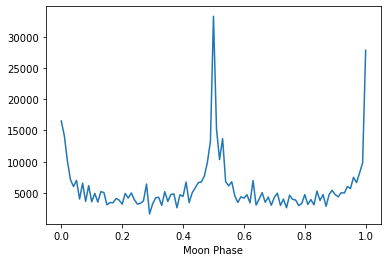

In [24]:
# line graph, moon phases vs 911 call volume

emergency_count = group_moon_phase["Emergency Reason"].count()
moon_line = emergency_count.plot(kind = "line")

moon_line


In [ ]:
# ALEX
# Boxplot moon phase and date group vs Emergency 
# group_moon_date = werewolf.groupby(["Moon Phase", "Date"])
#     From here, make boxplot
#     ANOVA and tests


In [25]:
# bin or remove
# 0 – new moon
# 0-0.25 – waxing crescent
# 0.25 – first quarter
# 0.25-0.5 – waxing gibbous
# 0.5 – full moon
# 0.5-0.75 – waning gibbous
# 0.75 – last quarter
# 0.75-1 – waning crescent


In [26]:
# TALHA
# Emergency reason vs moon phase
#     Case statement
#     
#     Group Emergency Reason
    #     Which emergency appears more in which moon phase
    #     bar chart Emergency Reason
#         LINE GRAPH!!


In [30]:
# JINGOU
# Emergency reason vs New Moon
# Emergency reason vs Full Moon
# Pie chart for both full and new moon

In [ ]:
# 
